<a href="https://colab.research.google.com/github/gulce13/recipes/blob/main/notebooks/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.15.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Sets the home directory as gdrive. Seems to already be the default, but we
# mount this just to be extra clear
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#prep the dataset

In [ ]:
from glob import glob # For regular expressions
png_mixed = glob('/content/gdrive/MyDrive/practice_folder/mixed_samples/*.png')

In [ ]:
len(png_mixed)

39

In [ ]:
'''
  Squares and pads images to 128x128 pixels to prepare them for the neural network
'''

import cv2

def preprocess_input(image):

    fixed_size = 128 # Final image should be 128 x 128
    image_size = image.shape[:2] # Gets the (y_dim, x_dim) for each image

    # The ratio needed to make the longest side of the image 128 pixels
    ratio = float(fixed_size)/max(image_size)

    # Calculates the new size by multiplying each dimension by the ratio
    new_size = tuple([int(x*ratio) for x in image_size])

    # Resizes the image to the new size
    img = cv2.resize(image, (new_size[1], new_size[0]))

    # Calculates the possible padding needed for the x and y dimensions
    delta_w = fixed_size - new_size[1]
    delta_h = fixed_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    # Makes a black border of 128x128 pixels around the image, so either
    # dimension less than 128 would be padded to 128
    color = [0, 0, 0] # RGB = 0,0,0 -> Black
    rescaled_image = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return(rescaled_image)

Lets try preprocessing with one random picture first

In [ ]:
im1=cv2.imread('/content/gdrive/MyDrive/practice_folder/mixed_samples/D20220511T070930_IFCB165.00006.png')

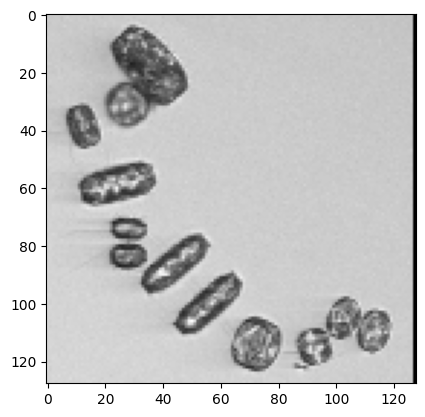

In [ ]:
# Displays an example image and label
rescaled_image = preprocess_input(im1)

# Prints image and then the label from the metadata
plt.figure()
plt.imshow(rescaled_image)


In [ ]:
# Preprocesses ALL the images in the sample, and compiles all the images into a dataset

dataset_mix = []
for filename in png_mixed:
  image = cv2.imread(filename)
  rescaled_images = preprocess_input(image)
  dataset_mix.append(rescaled_images)

In [ ]:
len(dataset_mix)

39

In [ ]:
#turned them into array
datasetm_4d=np.array(dataset_mix)


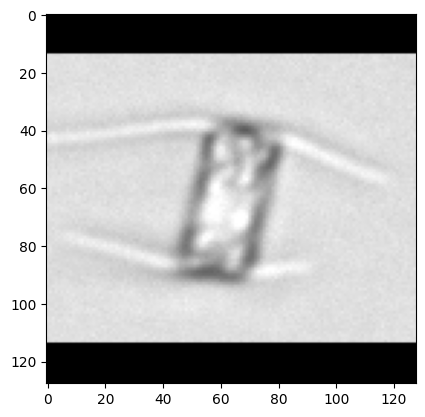

In [ ]:
plt.figure()
plt.imshow(datasetm_4d[30])#plot random picture from array

Loading the 5_guys model for prediction of my mixed samples

In [ ]:
from keras.models import model_from_json

In [ ]:
# load json and create model
json_file = open('/content/gdrive/MyDrive/five_guys/five_guys_outputs/Model_checkpoints/model-test-cnn-5000.json', 'r')
loaded_model_json = json_file.read()
json_file.close()



In [ ]:
loaded_model = model_from_json(loaded_model_json)

In [ ]:
weights=('/content/gdrive/MyDrive/five_guys/five_guys_outputs/Model_checkpoints/model-test-cnn-5000.h5')

In [ ]:
# load weights into new model
loaded_model.load_weights(weights)
print("Loaded model from disk")

Loaded model from disk


In [ ]:
datasetm_4d.shape

(39, 128, 128, 3)

In [ ]:
datasetm_3d = datasetm_4d[:,:,:,0] # Zeroes out the last parameter prep for the five_guys model

In [ ]:
datasetm_3d.shape

(39, 128, 128)

In [ ]:
five_guys_predict=loaded_model.predict(datasetm_3d)

2/2 [==============================] - 0s 72ms/step


In [ ]:
five_guys_predict

array([[0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.

In [ ]:
import numpy as np

In [ ]:
#Turn array predictions into five_groups labels
# Class labels
labels = ['chae', 'crypt', 'dino', 'eug', 'oxy']#got it from five_guys model

# Determine the predicted class index
predicted_class_indices = np.argmax(five_guys_predict, axis=1)

# Map indices to labels
predicted_labels = [labels[index] for index in predicted_class_indices]

# Now predicted_labels contains the label predictions corresponding to your model's output
print(predicted_labels)

['chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'oxy', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae', 'chae']


In [ ]:
import pandas as pd


# Convert the list of predicted labels to a pandas DataFrame
df_predicted_labels = pd.DataFrame(predicted_labels, columns=['PredictedLabel'])

# Save the DataFrame to a CSV file
df_predicted_labels.to_csv('/content/gdrive/MyDrive/practice_folder/mixed_samples/mixpredicted_labels.csv', index=False)

print("Predicted labels saved to 'predicted_labels.csv'.")


Predicted labels saved to 'predicted_labels.csv'.
